# Maryam Ahmadi

#  In this homework, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set. 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors 
from sklearn.metrics import confusion_matrix, classification_report


In [18]:
#Loading data
df = pd.read_csv('/Users/macintosh/Desktop/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


#### 2.2.1 Number of Observations: </font>

In [20]:
df.shape

(397, 9)

####  2.2.2	Field names

In [21]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

#### 2.2.3 Type of fields

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [23]:
table = df.describe(include='all')
table

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


# (a)	Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. [10 points] 

## 3.1 Data Processing/Cleaning </font>

In [24]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [25]:
df = df.drop(df[df.values == '?'].index)

In [26]:
Datatypes = {"Quantitative":['mpg','cylinders', 'displacement', 'horsepower','weight','acceleration','year', 'origin'], 'Qualitative':['name']}
quants = df[Datatypes['Quantitative']].astype(np.float_)
df = pd.concat([quants,df[Datatypes['Qualitative']]],axis = 1)


In [27]:
mpg01 = (df['mpg']> df['mpg'].median()).astype(np.float64)
df = pd.concat([df,mpg01.rename('mpg01')],axis = 1).drop('mpg',axis = 1)

In [28]:
df.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
mpg01           0
dtype: int64

In [29]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


##  (b)	Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings. 

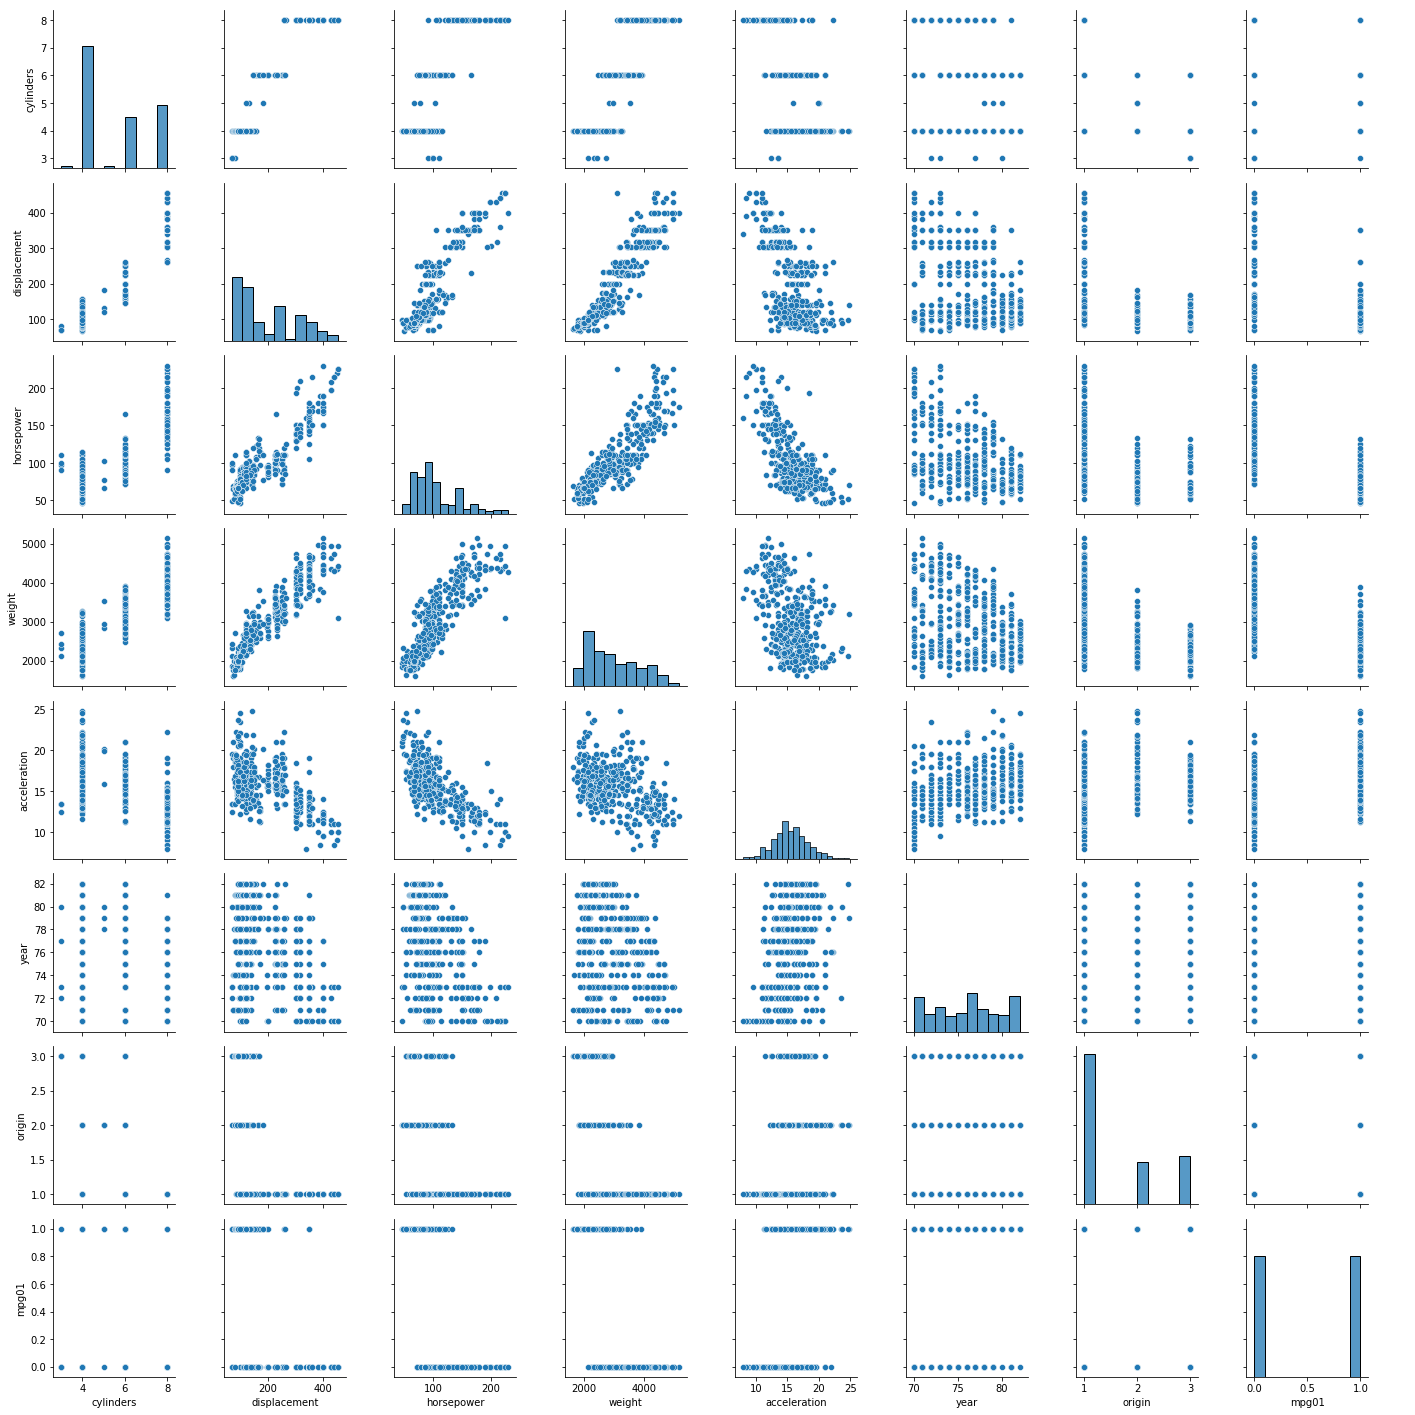

In [32]:
sns.pairplot(df)

### 3.1.1 Outlier Detection

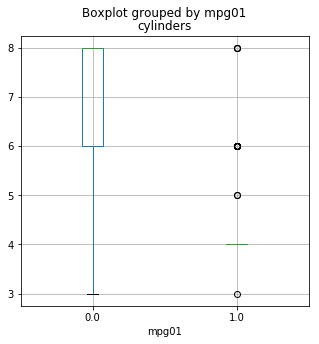

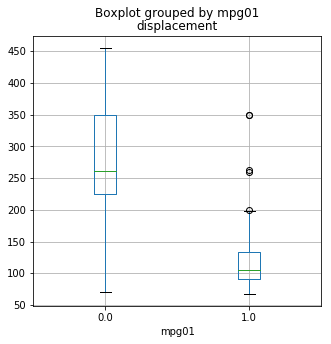

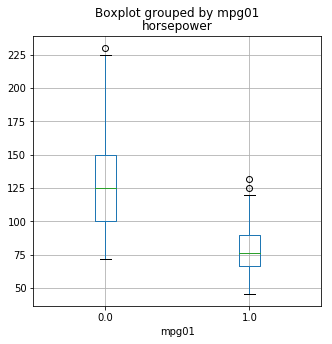

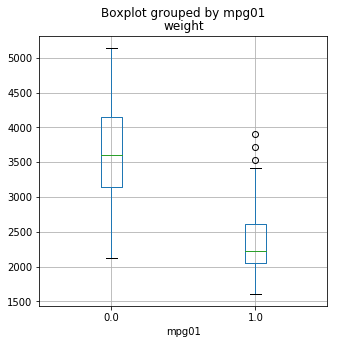

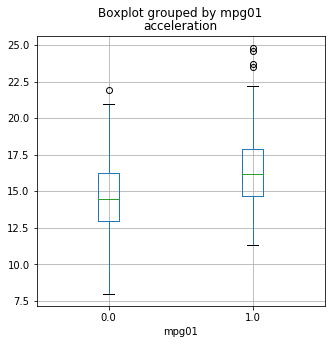

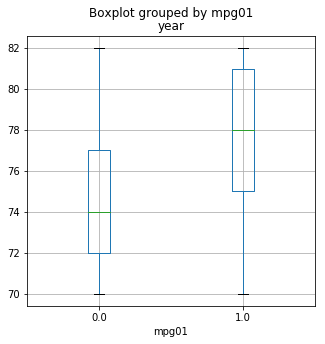

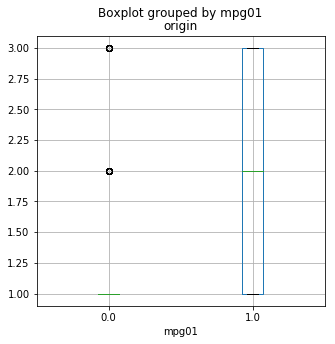

In [33]:
for i in df.columns.drop(['mpg01','name']):
    boxplot = df.boxplot(column=i, by = 'mpg01',figsize=(5,5))

# Histogram   </font>


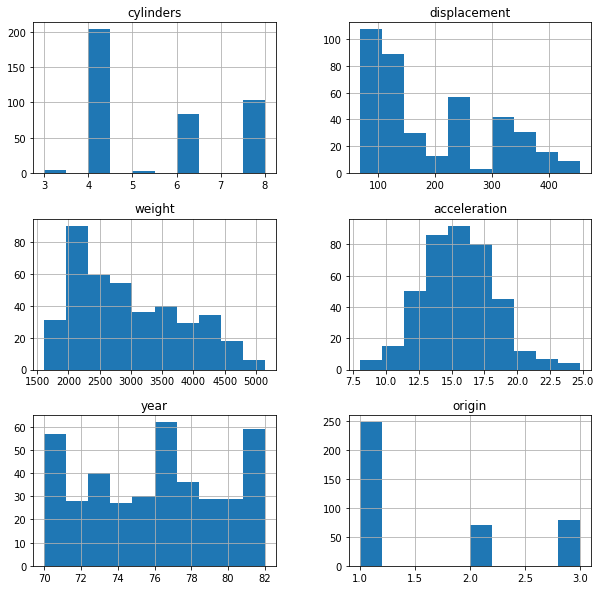

In [50]:
df.hist(column=['cylinders','displacement','horsepower','weight','acceleration','year','origin'], figsize=(10,10))
plt.show()

# Correlation Matrix heatmap

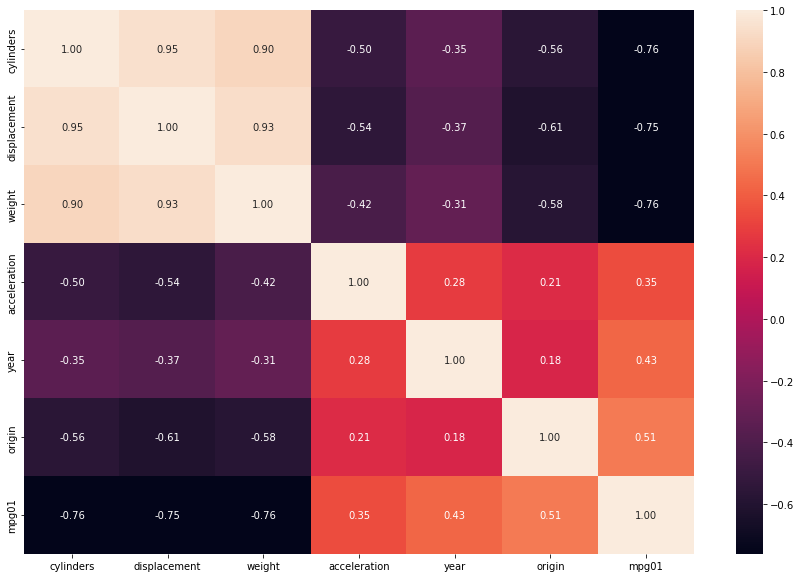

In [51]:
list1 = ['cylinders','displacement','horsepower','weight','acceleration','year','origin',"mpg01"]
plt.figure(figsize=(15,10))
sns.heatmap(df[list1].corr(), annot=True, fmt=".2f")
plt.show()

## Answer: Weight, displacement and cyclinders are the most predictive variables.

# (c)	Split the data into a training set and a test set. 

In [34]:
np.random.seed(5573)
train = np.random.rand(len(df))< 0.85
df_train = df[train]
df_test = df[~train]

In [35]:
df_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0
5,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,0.0


In [36]:
df_test.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
6,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala,0.0
10,8.0,383.0,170.0,3563.0,10.0,70.0,1.0,dodge challenger se,0.0
11,8.0,340.0,160.0,3609.0,8.0,70.0,1.0,plymouth 'cuda 340,0.0
12,8.0,400.0,150.0,3761.0,9.5,70.0,1.0,chevrolet monte carlo,0.0


# (d)	Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained? 

In [95]:
indep_variables = ['cylinders','displacement','weight']
X_train = np.array(df[train][indep_variables])
Y_train = np.array(df[train]['mpg01'])
X_test = np.array(df[~train][indep_variables])
Y_test = np.array(df[~train]['mpg01'])

# Logistic Reg.

In [96]:
LGR = LogisticRegression()
Model_LGR = LGR.fit(X_train,Y_train )

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
y_pred = Model_LGR.predict(X_test)
confusion_mtx = confusion_matrix(Y_test,y_pred)
print(confusion_mtx)


[[28  2]
 [ 1 23]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [103]:
score = Model_LGR.score(X_test, Y_test)
Error = 1- score
print('Accuracy=',score)
print('Test Error rate =',Error)

Accuracy= 0.9444444444444444
Test Error rate = 0.05555555555555558


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


# e) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [93]:
indep_variables = ['cylinders','displacement','weight']
X_train = np.array(df[train][indep_variables])
Y_train = np.array(df[train]['mpg01'])
X_test = np.array(df[~train][indep_variables])
Y_test = np.array(df[~train]['mpg01'])

In [92]:
for k in range(3,20):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, Y_train) 
    y_predict = classifier.predict(X_test)
    #  results: 
    print('K=', k)
    print(confusion_matrix(Y_test, y_predict))
    print(classification_report(Y_test, y_predict))

K= 3
[[28  2]
 [ 2 22]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        30
         1.0       0.92      0.92      0.92        24

   micro avg       0.93      0.93      0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

K= 4
[[29  1]
 [ 3 21]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        30
         1.0       0.95      0.88      0.91        24

   micro avg       0.93      0.93      0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54

K= 5
[[27  3]
 [ 1 23]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        30
         1.0       0.88      0.96      0.92        24

   micro avg       0.93      0.93      0.93        54
   macro avg       0.92      0.93      0.93        54
we

/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

All the performance metrics for each k are shown. Based on the results, if we select f1-score as our metric (because it combines the precision and recall), the best performances are for k= 8,9,11,12,13,14,15,16,18,19. with those k, the model performs same. 

In [104]:
Error = (2+1)/54
Error

0.05555555555555555

For the best KNN models, error rate is 0.055.